<div style="background-color: darkslategray; color: white; padding: 15px; border-radius: 8px;">
    <center><h1 style="font-family: Arial, sans-serif;">Predicting Rare Species</h1></center>
    <center><h3 style="font-family: Arial, sans-serif;">Deep Learning Project</h3></center>
</div>

**<h3>Table of Contents</h3>**
* [1. Environment Setup](#1-environment-setup)
    * [1.1 Import Libraries](#11-import-libraries)
    * [1.2 Import Dataset](#12-import-dataset)
* [2. Exploratory Data Analysis](#2-exploratory-data-analysis)
    * [2.1 Visualizations](#21-visualizations)
    * [2.2 Import Dataset](#22-feature-engineering)
* [3. Splitting the Dataset](#3-splitting-the-dataset)
* [4. Splitting the Dataset](#4-preprocessing)
    * [4.1 Image Generator and Augmentation](#41-image-generator-and-augmentation)


<div class="alert alert-block alert-success">

# **1.** Environment Setup

<div>

## 1.1 Import Libraries

In [12]:
import pandas as pd
import numpy as np
from pathlib import Path

import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import models
from tensorflow.keras import layers
from keras import regularizers

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # (or alternative)
from tensorflow.keras.optimizers import Adam

## 1.2 Import Dataset

In [16]:
# Set up the dataset directory

# Bruna
#path = r"/Users/brunasimoes/Desktop/nova_ims/2_semester/Trimestral/deep_learning/Projeto/rare_species"

#Margas
# path = r"/Users/margaridabravocardoso/Desktop/dsaa/fun_year/2nd_semester/deep_learning/rare_species"

path = Path("data/rare_species")

In [24]:
# Import Metadata
metadata_path = Path("../data/rare_species/metadata.csv")
df = pd.read_csv(metadata_path)
df.head()

rare_species_id  eol_content_id  eol_page_id  \
0  75fd91cb-2881-41cd-88e6-de451e8b60e2        12853737       449393   
1  28c508bc-63ff-4e60-9c8f-1934367e1528        20969394       793083   
2  00372441-588c-4af8-9665-29bee20822c0        28895411       319982   
3  29cc6040-6af2-49ee-86ec-ab7d89793828        29658536     45510188   
4  94004bff-3a33-4758-8125-bf72e6e57eab        21252576      7250886   

    kingdom    phylum            family  \
0  animalia  mollusca         unionidae   
1  animalia  chordata       geoemydidae   
2  animalia  chordata  cryptobranchidae   
3  animalia  chordata          turdidae   
4  animalia  chordata         indriidae   

                                           file_path  
0  mollusca_unionidae/12853737_449393_eol-full-si...  
1  chordata_geoemydidae/20969394_793083_eol-full-...  
2  chordata_cryptobranchidae/28895411_319982_eol-...  
3  chordata_turdidae/29658536_45510188_eol-full-s...  
4  chordata_indriidae/21252576_7250886_eol-full-s...

In [25]:
df.shape # 11983 images

(11983, 7)

In [26]:
# Windows
# df["full_file_path"] = df["file_path"].apply(lambda x: os.path.join(path, x.replace("/", "\\")))

# Mac
df["full_file_path"] = df["file_path"].apply(lambda x: os.path.join(path, x))
df

rare_species_id  eol_content_id  eol_page_id  \
0      75fd91cb-2881-41cd-88e6-de451e8b60e2        12853737       449393   
1      28c508bc-63ff-4e60-9c8f-1934367e1528        20969394       793083   
2      00372441-588c-4af8-9665-29bee20822c0        28895411       319982   
3      29cc6040-6af2-49ee-86ec-ab7d89793828        29658536     45510188   
4      94004bff-3a33-4758-8125-bf72e6e57eab        21252576      7250886   
...                                     ...             ...          ...   
11978  1fa96ea5-32fa-4a25-b8d2-fa99f6e2cb89        29734618      1011315   
11979  628bf2b4-6ecc-4017-a8e6-4306849e0cfc        29972861      1056842   
11980  0ecfdec9-b1cd-4d43-96fc-2f8889ec1ad9        30134195     52572074   
11981  27fdb1e9-c5fb-459a-8b6a-6fb222b1c512         9474963     46559139   
11982  54894a59-151f-4814-ac32-3a336841e58e         9465817       326525   

        kingdom    phylum            family  \
0      animalia  mollusca         unionidae   
1      animalia  chordata       geoemydidae   
2      animalia  chordata  cryptobranchidae   
3      animalia  chordata          turdidae   
4      animalia  chordata         indriidae   
...         ...       ...               ...   
11978  animalia  chordata         leporidae   
11979  animalia  chordata          emydidae   
11980  animalia  chordata        dasyatidae   
11981  animalia  chordata        mustelidae   
11982  animalia  chordata         lemuridae   

                                               file_path  \
0      mollusca_unionidae/12853737_449393_eol-full-si...   
1      chordata_geoemydidae/20969394_793083_eol-full-...   
2      chordata_cryptobranchidae/28895411_319982_eol-...   
3      chordata_turdidae/29658536_45510188_eol-full-s...   
4      chordata_indriidae/21252576_7250886_eol-full-s...   
...                                                  ...   
11978  chordata_leporidae/29734618_1011315_eol-full-s...   
11979  chordata_emydidae/29972861_1056842_eol-full-si...   
11980  chordata_dasyatidae/30134195_52572074_eol-full...   
11981  chordata_mustelidae/9474963_46559139_eol-full-...   
11982  chordata_lemuridae/9465817_326525_eol-full-siz...   

                                          full_file_path  
0      data/rare_species/mollusca_unionidae/12853737_...  
1      data/rare_species/chordata_geoemydidae/2096939...  
2      data/rare_species/chordata_cryptobranchidae/28...  
3      data/rare_species/chordata_turdidae/29658536_4...  
4      data/rare_species/chordata_indriidae/21252576_...  
...                                                  ...  
11978  data/rare_species/chordata_leporidae/29734618_...  
11979  data/rare_species/chordata_emydidae/29972861_1...  
11980  data/rare_species/chordata_dasyatidae/30134195...  
11981  data/rare_species/chordata_mustelidae/9474963_...  
11982  data/rare_species/chordata_lemuridae/9465817_3...  

[11983 rows x 8 columns]

In [27]:
pd.set_option('display.max_colwidth', None)
print(df['full_file_path'])


0               data/rare_species/mollusca_unionidae/12853737_449393_eol-full-size-copy.jpg
1             data/rare_species/chordata_geoemydidae/20969394_793083_eol-full-size-copy.jpg
2        data/rare_species/chordata_cryptobranchidae/28895411_319982_eol-full-size-copy.jpg
3              data/rare_species/chordata_turdidae/29658536_45510188_eol-full-size-copy.jpg
4              data/rare_species/chordata_indriidae/21252576_7250886_eol-full-size-copy.jpg
                                                ...                                        
11978          data/rare_species/chordata_leporidae/29734618_1011315_eol-full-size-copy.jpg
11979           data/rare_species/chordata_emydidae/29972861_1056842_eol-full-size-copy.jpg
11980        data/rare_species/chordata_dasyatidae/30134195_52572074_eol-full-size-copy.jpg
11981         data/rare_species/chordata_mustelidae/9474963_46559139_eol-full-size-copy.jpg
11982            data/rare_species/chordata_lemuridae/9465817_326525_eol-full-si

<div class="alert alert-block alert-success">

# **2.** Exploratory Data Analysis

<div>

## 2.1 Visualizations

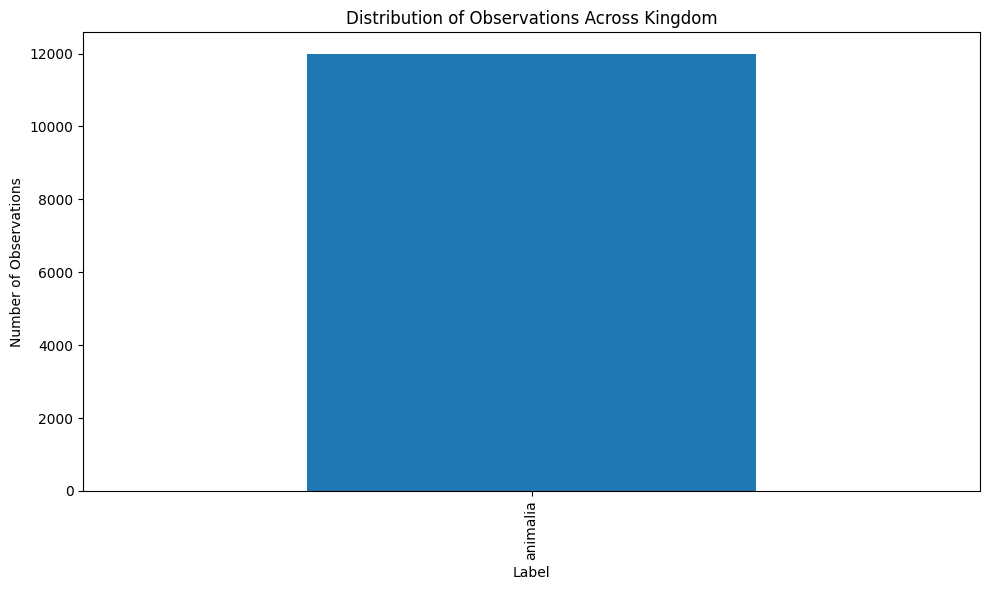

In [8]:
kingdom_counts = df['kingdom'].value_counts()

plt.figure(figsize=(10, 6))
kingdom_counts.plot(kind='bar')
plt.title('Distribution of Observations Across Kingdom')
plt.xlabel('Label')
plt.ylabel('Number of Observations')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

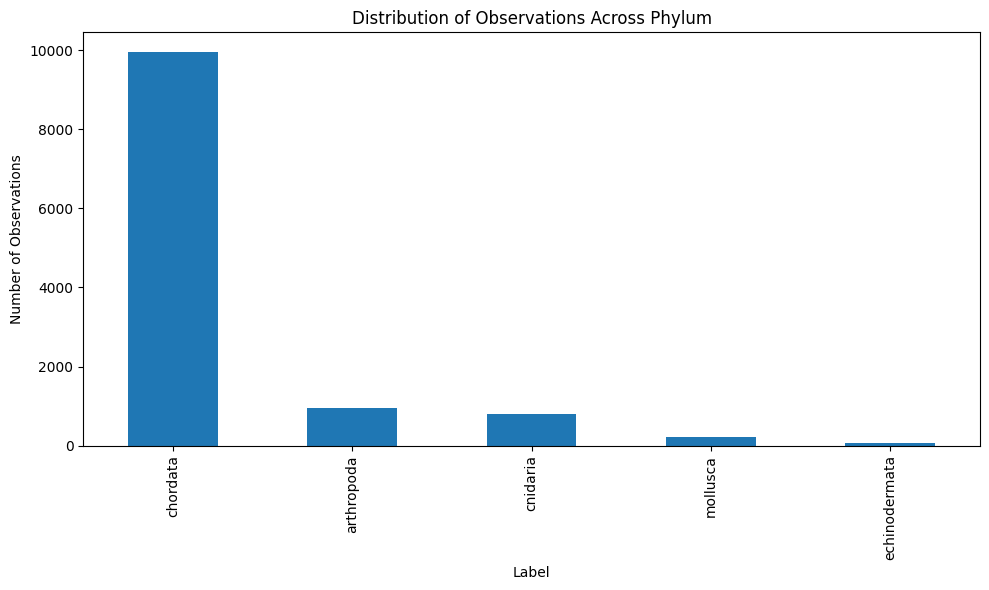

In [9]:
phylum_counts = df['phylum'].value_counts()

plt.figure(figsize=(10, 6))
phylum_counts.plot(kind='bar')
plt.title('Distribution of Observations Across Phylum')
plt.xlabel('Label')
plt.ylabel('Number of Observations')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

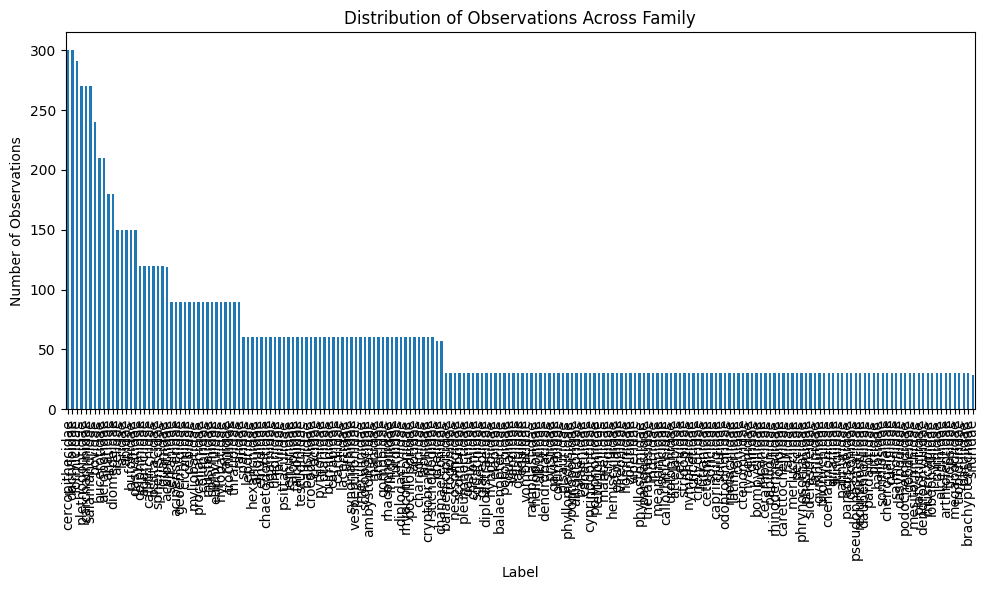

In [10]:
family_counts = df['family'].value_counts()

plt.figure(figsize=(10, 6))
family_counts.plot(kind='bar')
plt.title('Distribution of Observations Across Family')
plt.xlabel('Label')
plt.ylabel('Number of Observations')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [11]:
family_counts = df["family"].value_counts(normalize=True)*100

df_family_proportions = pd.DataFrame({
    "Family": family_counts.index,
    "Proportion (%)": family_counts.values.round(4)  
})

df_family_proportions # 202 different families

Family  Proportion (%)
0      cercopithecidae          2.5035
1          dactyloidae          2.5035
2           formicidae          2.4284
3       plethodontidae          2.2532
4       carcharhinidae          2.2532
..                 ...             ...
197       megapodiidae          0.2504
198       tropiduridae          0.2504
199          parulidae          0.2504
200  brachypteraciidae          0.2504
201          siluridae          0.2420

[202 rows x 2 columns]

In [12]:
num_families_025 = int((df_family_proportions["Proportion (%)"] <= 0.2505).sum())
num_families_025 # 118 families have less than 0.2505% of images

118

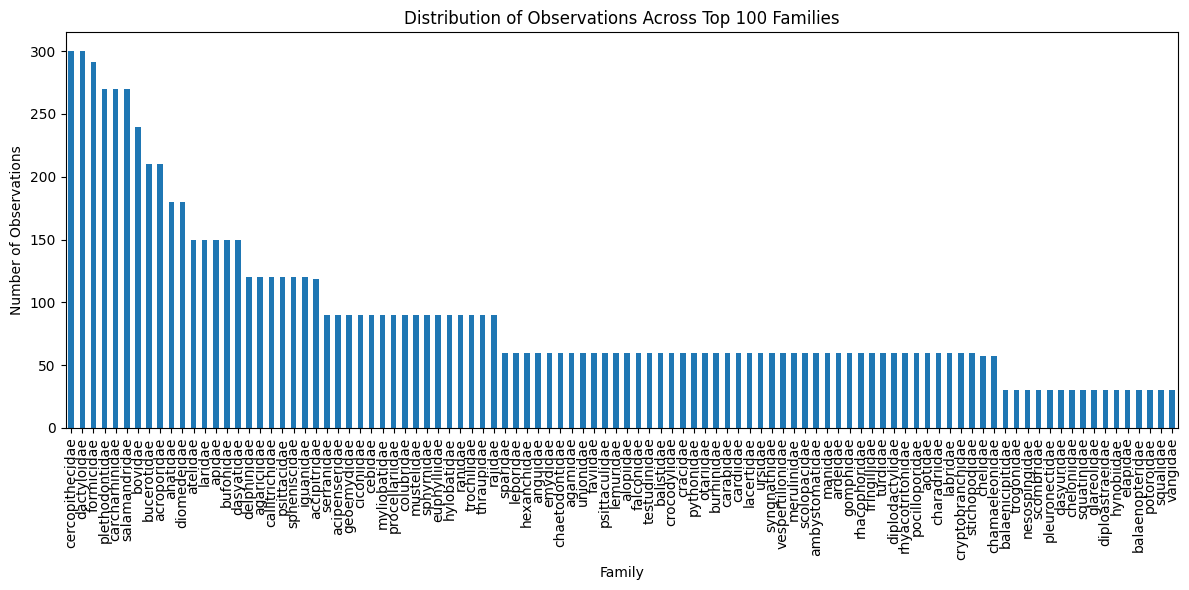

In [13]:
top_100_families = df['family'].value_counts().nlargest(100)

# Plot the distribution
plt.figure(figsize=(12, 6))
top_100_families.plot(kind='bar')
plt.title('Distribution of Observations Across Top 100 Families')
plt.xlabel('Family')
plt.ylabel('Number of Observations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [14]:
top_84_family_proportion_sum = df_family_proportions.iloc[:84]["Proportion (%)"].sum()
top_84_family_proportion_sum # although 118 families represent less than 0.25% of the dataset, the 84 that have >0.25% represent only 70.46% of the dataset

np.float64(70.4666)

## 2.2 Feature Engineering

In [15]:
# is it better to predict phylum and then family or a concatenation of the two?

In [16]:
df["phylum_family"] = df["phylum"] + "_" + df["family"]
df

rare_species_id  eol_content_id  eol_page_id  \
0      75fd91cb-2881-41cd-88e6-de451e8b60e2        12853737       449393   
1      28c508bc-63ff-4e60-9c8f-1934367e1528        20969394       793083   
2      00372441-588c-4af8-9665-29bee20822c0        28895411       319982   
3      29cc6040-6af2-49ee-86ec-ab7d89793828        29658536     45510188   
4      94004bff-3a33-4758-8125-bf72e6e57eab        21252576      7250886   
...                                     ...             ...          ...   
11978  1fa96ea5-32fa-4a25-b8d2-fa99f6e2cb89        29734618      1011315   
11979  628bf2b4-6ecc-4017-a8e6-4306849e0cfc        29972861      1056842   
11980  0ecfdec9-b1cd-4d43-96fc-2f8889ec1ad9        30134195     52572074   
11981  27fdb1e9-c5fb-459a-8b6a-6fb222b1c512         9474963     46559139   
11982  54894a59-151f-4814-ac32-3a336841e58e         9465817       326525   

        kingdom    phylum            family  \
0      animalia  mollusca         unionidae   
1      animalia  chordata       geoemydidae   
2      animalia  chordata  cryptobranchidae   
3      animalia  chordata          turdidae   
4      animalia  chordata         indriidae   
...         ...       ...               ...   
11978  animalia  chordata         leporidae   
11979  animalia  chordata          emydidae   
11980  animalia  chordata        dasyatidae   
11981  animalia  chordata        mustelidae   
11982  animalia  chordata         lemuridae   

                                                              file_path  \
0             mollusca_unionidae/12853737_449393_eol-full-size-copy.jpg   
1           chordata_geoemydidae/20969394_793083_eol-full-size-copy.jpg   
2      chordata_cryptobranchidae/28895411_319982_eol-full-size-copy.jpg   
3            chordata_turdidae/29658536_45510188_eol-full-size-copy.jpg   
4            chordata_indriidae/21252576_7250886_eol-full-size-copy.jpg   
...                                                                 ...   
11978        chordata_leporidae/29734618_1011315_eol-full-size-copy.jpg   
11979         chordata_emydidae/29972861_1056842_eol-full-size-copy.jpg   
11980      chordata_dasyatidae/30134195_52572074_eol-full-size-copy.jpg   
11981       chordata_mustelidae/9474963_46559139_eol-full-size-copy.jpg   
11982          chordata_lemuridae/9465817_326525_eol-full-size-copy.jpg   

                                                                                                                                                      full_file_path  \
0             /Users/brunasimoes/Desktop/nova_ims/2_semester/Trimestral/deep_learning/Projeto/rare_species/mollusca_unionidae/12853737_449393_eol-full-size-copy.jpg   
1           /Users/brunasimoes/Desktop/nova_ims/2_semester/Trimestral/deep_learning/Projeto/rare_species/chordata_geoemydidae/20969394_793083_eol-full-size-copy.jpg   
2      /Users/brunasimoes/Desktop/nova_ims/2_semester/Trimestral/deep_learning/Projeto/rare_species/chordata_cryptobranchidae/28895411_319982_eol-full-size-copy.jpg   
3            /Users/brunasimoes/Desktop/nova_ims/2_semester/Trimestral/deep_learning/Projeto/rare_species/chordata_turdidae/29658536_45510188_eol-full-size-copy.jpg   
4            /Users/brunasimoes/Desktop/nova_ims/2_semester/Trimestral/deep_learning/Projeto/rare_species/chordata_indriidae/21252576_7250886_eol-full-size-copy.jpg   
...                                                                                                                                                              ...   
11978        /Users/brunasimoes/Desktop/nova_ims/2_semester/Trimestral/deep_learning/Projeto/rare_species/chordata_leporidae/29734618_1011315_eol-full-size-copy.jpg   
11979         /Users/brunasimoes/Desktop/nova_ims/2_semester/Trimestral/deep_learning/Projeto/rare_species/chordata_emydidae/29972861_1056842_eol-full-size-copy.jpg   
11980      /Users/brunasimoes/Desktop/nova_ims/2_semester/Trimestral/deep_learning/Projeto/rare_species/chordata_dasyatidae/30134195_5257

In [17]:
family_phylum_counts = df.groupby("phylum")["family"].nunique()

In [18]:
family_phylum_counts # the phylum with the most families is chordata

phylum
arthropoda        17
chordata         166
cnidaria          13
echinodermata      1
mollusca           5
Name: family, dtype: int64

In [19]:
anomaly_counts = df.groupby("family")["phylum"].nunique()

In [20]:
anomaly_counts.value_counts() # there are no families that belong to more than 1 phylum

phylum
1    202
Name: count, dtype: int64

In [21]:
phylum_family_counts = df["phylum_family"].value_counts(normalize=True)*100

df_phylum_family_proportions = pd.DataFrame({
    "phylum_family": phylum_family_counts.index,
    "Proportion (%)": phylum_family_counts.values.round(4)  
})

df_phylum_family_proportions # 202 different families

phylum_family  Proportion (%)
0      chordata_cercopithecidae          2.5035
1          chordata_dactyloidae          2.5035
2         arthropoda_formicidae          2.4284
3       chordata_plethodontidae          2.2532
4       chordata_carcharhinidae          2.2532
..                          ...             ...
197       chordata_megapodiidae          0.2504
198       chordata_tropiduridae          0.2504
199          chordata_parulidae          0.2504
200  chordata_brachypteraciidae          0.2504
201          chordata_siluridae          0.2420

[202 rows x 2 columns]

<div class="alert alert-block alert-success">

# **3.** Splitting the Dataset

<div>

In [22]:
train_path = os.path.join(path, 'train')
valid_path = os.path.join(path, 'valid')
test_path = os.path.join(path, 'test')

# Split the data into training, validation, and testing sets
train_df, test_valid_df = train_test_split(df, test_size=0.3, shuffle=True, random_state=42, stratify=df['family'])
valid_df, test_df = train_test_split(test_valid_df, test_size=0.5, shuffle=True, random_state=42, stratify=test_valid_df['family'])

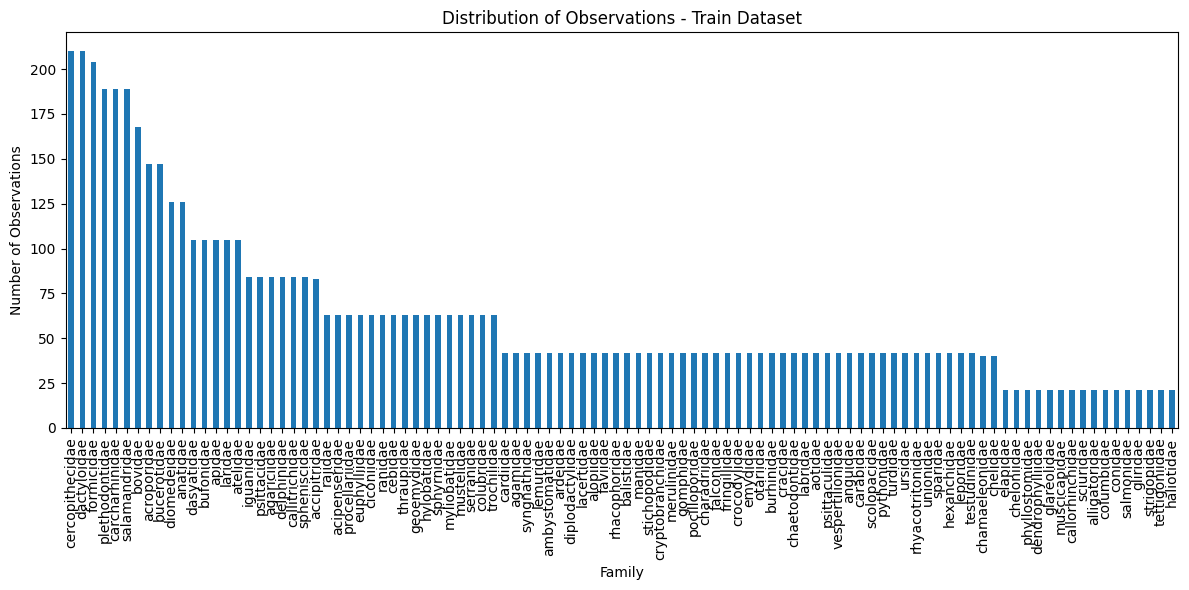

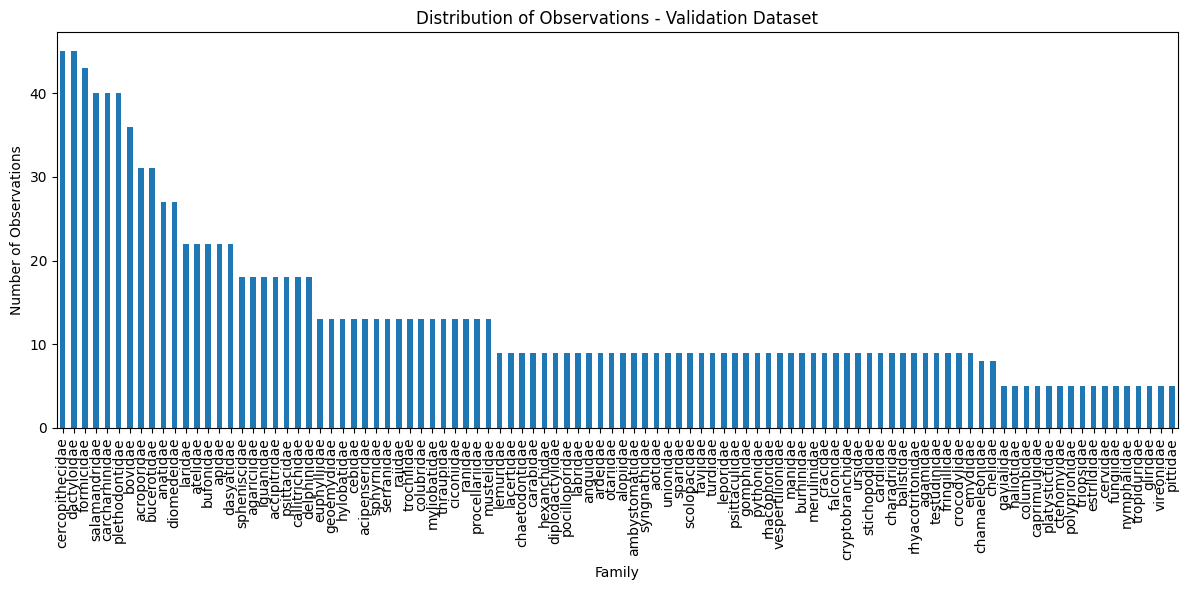

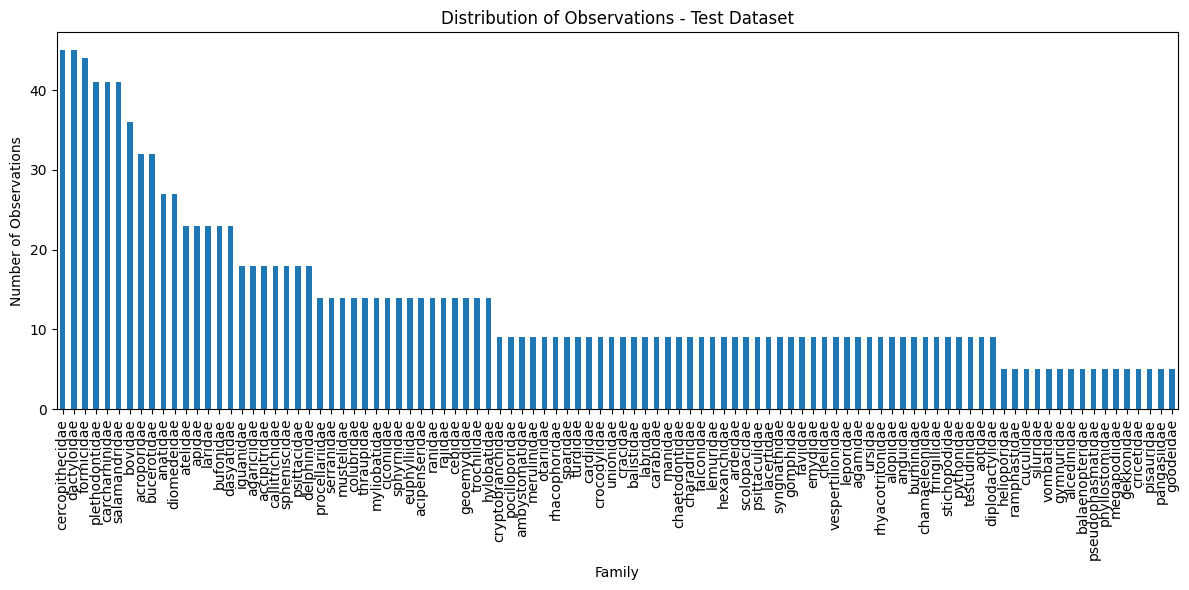

In [23]:
# Train
train_df_counts = train_df['family'].value_counts().nlargest(100)

plt.figure(figsize=(12, 6))
train_df_counts.plot(kind='bar')
plt.title('Distribution of Observations - Train Dataset')
plt.xlabel('Family')
plt.ylabel('Number of Observations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show() 

# Validation
valid_df_counts = valid_df['family'].value_counts().nlargest(100)

plt.figure(figsize=(12, 6))
valid_df_counts.plot(kind='bar')
plt.title('Distribution of Observations - Validation Dataset')
plt.xlabel('Family')
plt.ylabel('Number of Observations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show() 

# Test
test_df_counts = test_df['family'].value_counts().nlargest(100)

plt.figure(figsize=(12, 6))
test_df_counts.plot(kind='bar')
plt.title('Distribution of Observations - Test Dataset')
plt.xlabel('Family')
plt.ylabel('Number of Observations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show() 

In [24]:
print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(valid_df)}")
print(f"Testing samples: {len(test_df)}")

Training samples: 8388
Validation samples: 1797
Testing samples: 1798


<div class="alert alert-block alert-success">

# **4.** Preprocessing

<div>

## 4.1 Image Generator and Augmentation

- Normalizes pixel values (e.g., rescaling from [0,255] to [0,1]).
- Resizes images to a fixed size (e.g., 224x224 pixels).
- Applies augmentation (only during training).
- Converts images to batches (e.g., batch_size=32 loads 32 images at a time).

In [25]:
# base_path = "/Users/margaridabravocardoso/Desktop/rare_species/"
# train_df["full_file_path"] = base_path + train_df["file_path"]
# valid_df["full_file_path"] = base_path + valid_df["file_path"]
# test_df["full_file_path"] = base_path + test_df["file_path"]
print(train_df["full_file_path"].apply(os.path.exists).value_counts())

full_file_path
True    8388
Name: count, dtype: int64


In [26]:
# Set up the ImageDataGenerators and define the augmentation parameters:
train_datagen = ImageDataGenerator(
    #rotation_range=20,      
    #zoom_range=0.2,
    #rotation_range=0, 
    #width_shift_range=0.1,  
    #height_shift_range=0.1,  
    #zoom_range=0,  # No zoom
    #horizontal_flip=False,  
    #vertical_flip=False,  
    #brightness_range=[0.8, 1.2],  
    #fill_mode='nearest', 
)
valid_datagen = ImageDataGenerator(
    #rotation_range=20,      
    #zoom_range=0.2,
    """""
    rotation_range=0, 
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    zoom_range=0,  # No zoom
    horizontal_flip=False,  
    vertical_flip=False, 
    brightness_range=[0.8, 1.2],  
    fill_mode='nearest', 
    """
)
test_datagen = ImageDataGenerator(
    """""
    #rotation_range=20,       
    #zoom_range=0.2,  
    rotation_range=0,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    zoom_range=0,  
    horizontal_flip=False,  
    vertical_flip=False, 
    brightness_range=[0.8, 1.2],  
    fill_mode='nearest', 
    """
)

# Flow from directory for training data
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=train_path,
    x_col='full_file_path',
    y_col='family',
    color_mode='rgb', 
    target_size=(224, 224), 
    batch_size=20, 
    class_mode='categorical',
    shuffle = True,
    class_weights = 'balanced',
    rescale=1./255  # Normalization factor
)

# Flow from directory for validation data
valid_generator = valid_datagen.flow_from_dataframe(
    valid_df,
    directory=valid_path,
    x_col='full_file_path',
    color_mode='rgb',
    y_col='family',
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical',
    shuffle = False,
    class_weights = 'balanced',
    rescale=1./255  # Normalization factor
)

# Flow from directory for testing data
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=test_path,
    x_col='full_file_path',
    color_mode='rgb',
    y_col='family',
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical',
    shuffle = False, 
    class_weights = 'balanced',
    rescale=1./255  # Normalization factor
)

Found 8388 validated image filenames belonging to 202 classes.
Found 1797 validated image filenames belonging to 202 classes.
Found 1798 validated image filenames belonging to 202 classes.


In [27]:
print(df["full_file_path"].head())  # Verifique se os caminhos parecem corretos
print(df["full_file_path"].apply(os.path.exists).value_counts())  # Quantos arquivos realmente existem?

0           /Users/brunasimoes/Desktop/nova_ims/2_semester/Trimestral/deep_learning/Projeto/rare_species/mollusca_unionidae/12853737_449393_eol-full-size-copy.jpg
1         /Users/brunasimoes/Desktop/nova_ims/2_semester/Trimestral/deep_learning/Projeto/rare_species/chordata_geoemydidae/20969394_793083_eol-full-size-copy.jpg
2    /Users/brunasimoes/Desktop/nova_ims/2_semester/Trimestral/deep_learning/Projeto/rare_species/chordata_cryptobranchidae/28895411_319982_eol-full-size-copy.jpg
3          /Users/brunasimoes/Desktop/nova_ims/2_semester/Trimestral/deep_learning/Projeto/rare_species/chordata_turdidae/29658536_45510188_eol-full-size-copy.jpg
4          /Users/brunasimoes/Desktop/nova_ims/2_semester/Trimestral/deep_learning/Projeto/rare_species/chordata_indriidae/21252576_7250886_eol-full-size-copy.jpg
Name: full_file_path, dtype: object
full_file_path
True    11983
Name: count, dtype: int64


In [28]:
num_classes = len(train_generator.class_indices)
print(num_classes)

202


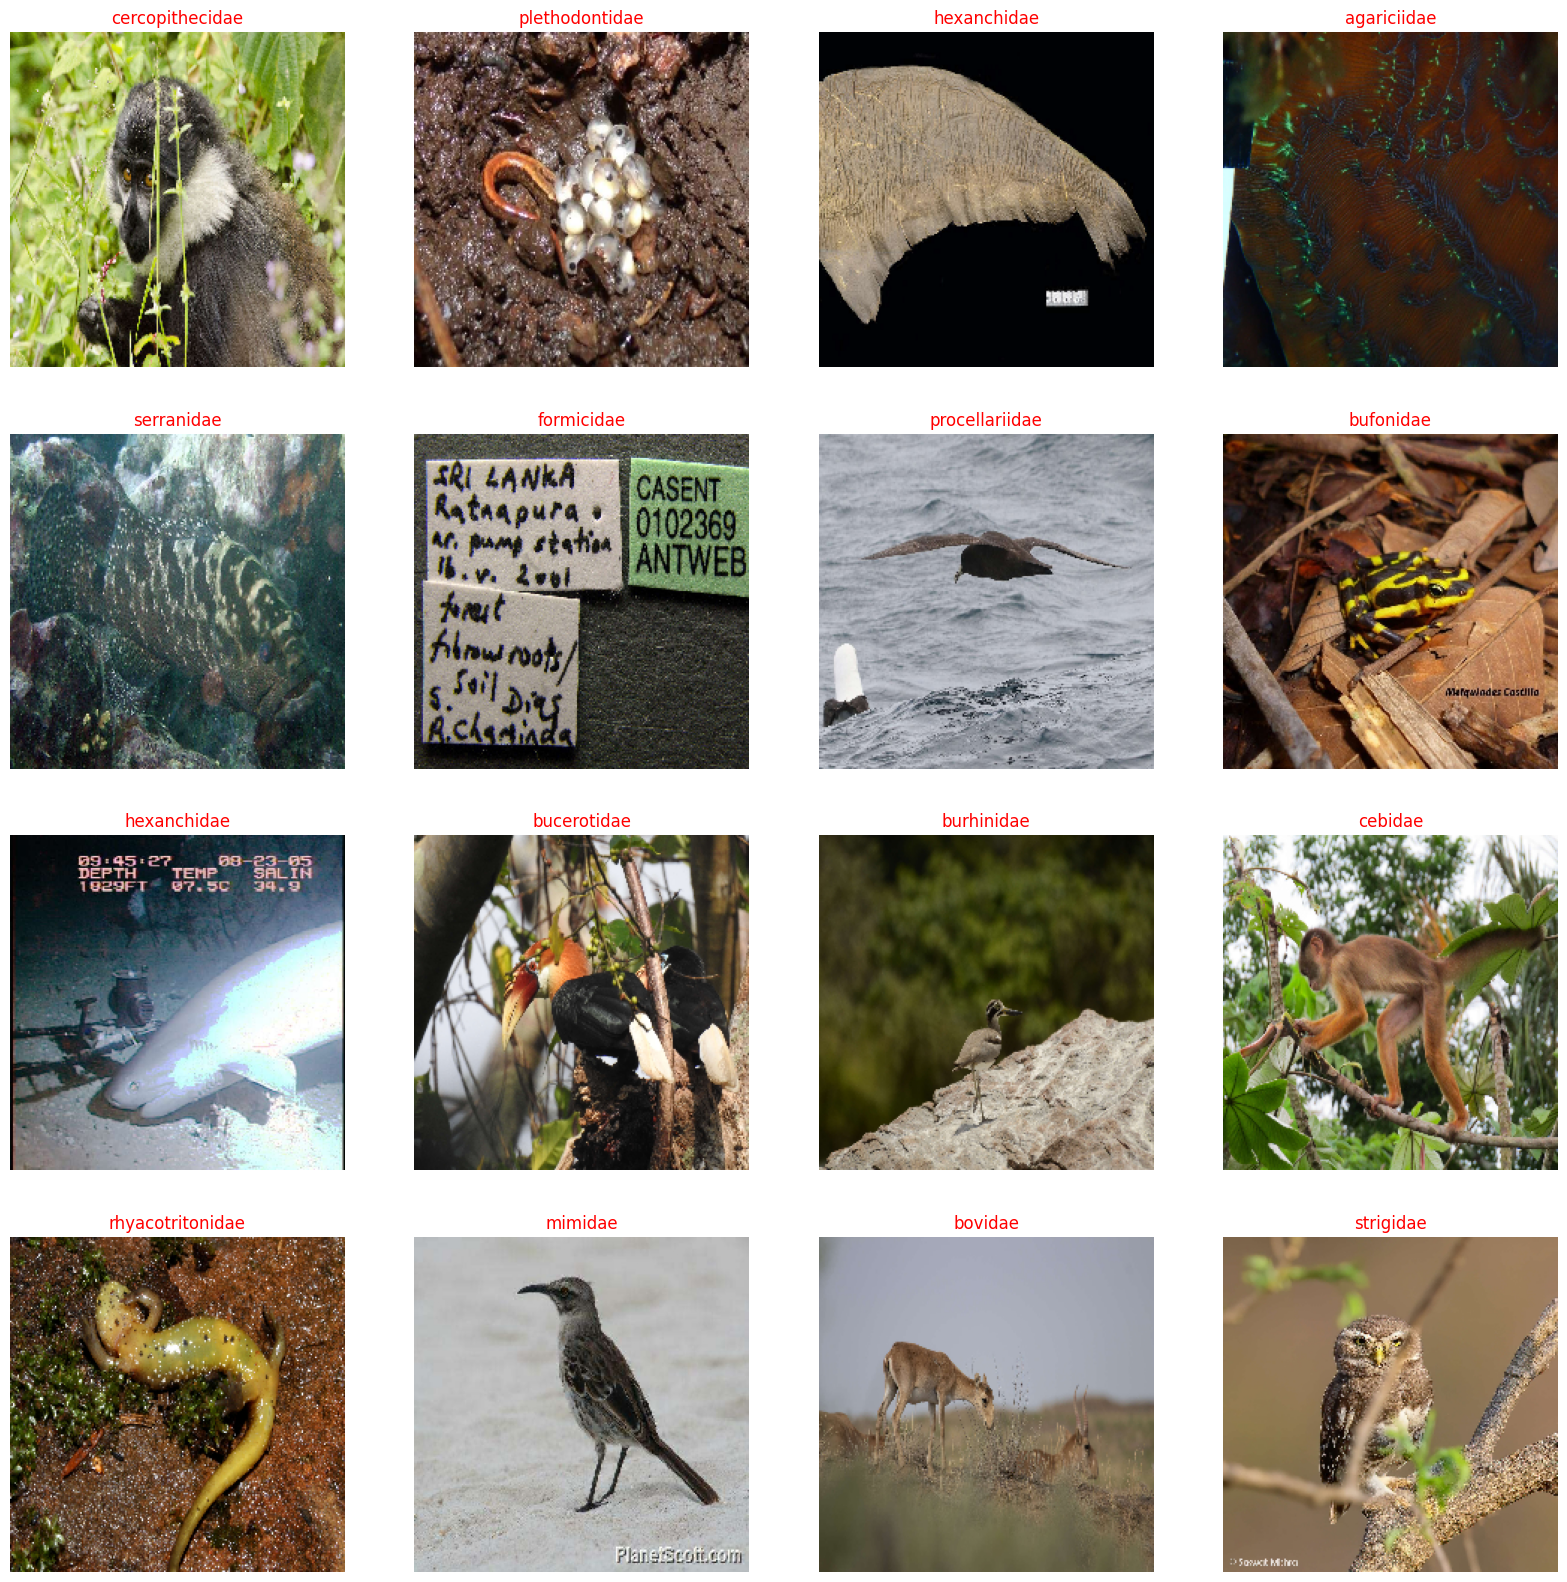

In [29]:
g_dict = train_generator.class_indices
classes= list(g_dict.keys())

images, labels = next(train_generator)

plt.figure(figsize= (20,20))

for i in range (16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index= np.argmax(labels[i]) #[0,0,0,1,0]
    class_name = classes[index]
    plt.title(class_name,c='r', fontsize=12)
    plt.axis('off')
plt.show()

<div class="alert alert-block alert-success">

# **5.** Models

<div>

## Sequential

In [ ]:
model = models.Sequential()
# These layers extract spatial features from the image
# Pooling:
# Reduces spatial dimensions (downsampling) while keeping the most important features.
# Makes the model more efficient, less overfitting.
# Helps make feature extraction invariant to small translations (e.g., an object moving a few pixels).

model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3))) # 32 filters. 3*something
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5)) 

# Dense layers learn to map features to output classes
model.add(layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(202, activation="softmax"))

In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 202)            │       103,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,782,154 (37.32 MB)

 Trainable params: 9,782,154 (37.32 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer='rmsprop', loss= 'categorical_crossentropy', 
              metrics= ['accuracy'])

In [37]:
epochs=5
history = model.fit(train_generator, epochs= epochs, verbose= 1, batch_size = 20, validation_data= valid_generator)

Epoch 1/5
225/420 ━━━━━━━━━━━━━━━━━━━━ 56s 291ms/step - accuracy: 0.0166 - loss: 12.8658

/Users/brunasimoes/Desktop/nova_ims/2_semester/Trimestral/deep_learning/deep-learning-project/.venv/lib/python3.11/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (115600000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.0227 - loss: 10.0603

/Users/brunasimoes/Desktop/nova_ims/2_semester/Trimestral/deep_learning/deep-learning-project/.venv/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


420/420 ━━━━━━━━━━━━━━━━━━━━ 144s 342ms/step - accuracy: 0.0227 - loss: 10.0517 - val_accuracy: 0.0562 - val_loss: 5.1359
Epoch 2/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 151s 360ms/step - accuracy: 0.0655 - loss: 5.1702 - val_accuracy: 0.0902 - val_loss: 4.9976
Epoch 3/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 158s 375ms/step - accuracy: 0.1015 - loss: 4.9435 - val_accuracy: 0.1102 - val_loss: 4.8404
Epoch 4/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 161s 383ms/step - accuracy: 0.1137 - loss: 4.8327 - val_accuracy: 0.1124 - val_loss: 4.9062
Epoch 5/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 158s 376ms/step - accuracy: 0.1271 - loss: 4.6965 - val_accuracy: 0.1313 - val_loss: 4.7041


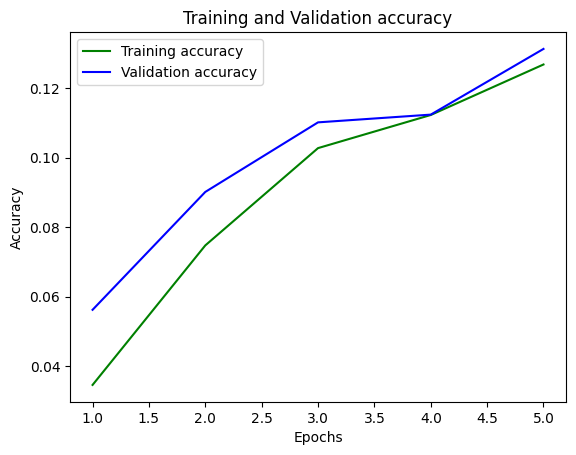

In [38]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
xaxis = range(1,epochs+1)
plt.plot(xaxis, loss_train, 'g', label='Training accuracy')
plt.plot(xaxis, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

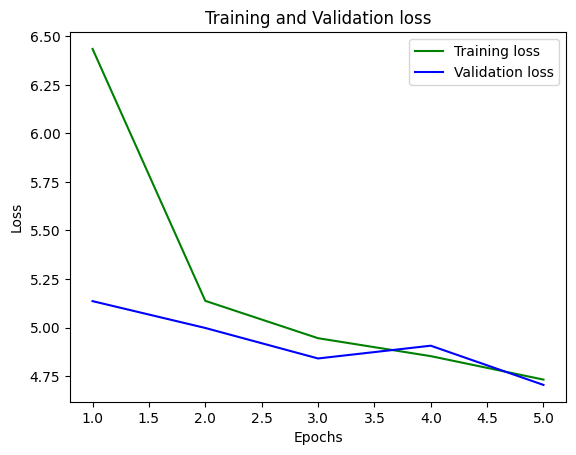

In [39]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
xaxis = range(1,epochs+1)
plt.plot(xaxis, loss_train, 'g', label='Training loss')
plt.plot(xaxis, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [40]:
#Evaluate the Model on Test Data
test_loss, test_accuracy = model.evaluate(test_generator)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 198ms/step - accuracy: 0.1441 - loss: 4.6864
Test Loss: 4.646725654602051
Test Accuracy: 0.14071190357208252


## ResNet50

In [41]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # freeze weights

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,164,170 (92.18 MB)

 Trainable params: 576,458 (2.20 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [43]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=valid_generator,
    callbacks=[]  # We'll add useful ones next!
)

Epoch 1/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 422s 1s/step - accuracy: 0.0231 - loss: 5.7050 - val_accuracy: 0.1319 - val_loss: 4.8280
Epoch 2/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 566s 1s/step - accuracy: 0.0926 - loss: 4.8204 - val_accuracy: 0.1803 - val_loss: 4.3717
Epoch 3/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 263s 627ms/step - accuracy: 0.1460 - loss: 4.4197 - val_accuracy: 0.2415 - val_loss: 3.9182
Epoch 4/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 280s 666ms/step - accuracy: 0.1976 - loss: 4.0297 - val_accuracy: 0.2788 - val_loss: 3.5588
Epoch 5/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 282s 672ms/step - accuracy: 0.2365 - loss: 3.6563 - val_accuracy: 0.3205 - val_loss: 3.2455


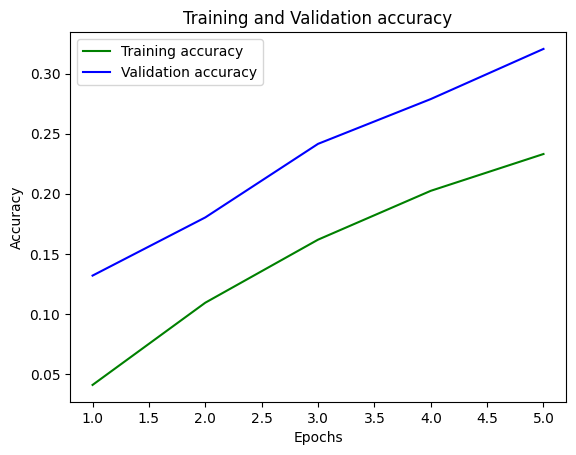

In [44]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
xaxis = range(1,epochs+1)
plt.plot(xaxis, loss_train, 'g', label='Training accuracy')
plt.plot(xaxis, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

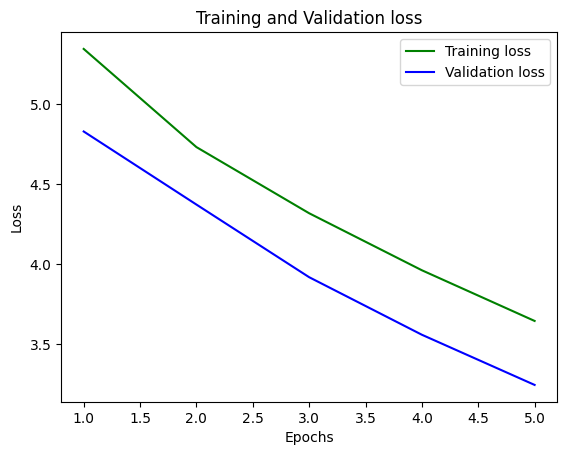

In [45]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
xaxis = range(1,epochs+1)
plt.plot(xaxis, loss_train, 'g', label='Training loss')
plt.plot(xaxis, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
#Evaluate the Model on Test Data
test_loss, test_accuracy = model.evaluate(test_generator)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

90/90 ━━━━━━━━━━━━━━━━━━━━ 46s 505ms/step - accuracy: 0.3080 - loss: 3.2686
Test Loss: 3.216336488723755
Test Accuracy: 0.32202446460723877


## Sequential - mudámos os filtros

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(24, (3, 3), activation="relu", input_shape=(224, 224, 3))) # 32 filters. 3*something
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5)) 

model.add(layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(202, activation="softmax"))

In [51]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 222, 222, 24)   │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 111, 111, 24)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 109, 109, 32)   │         6,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 202)            │       103,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,641,290 (36.78 MB)

 Trainable params: 9,641,290 (36.78 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(optimizer='rmsprop', loss= 'categorical_crossentropy', 
              metrics= ['accuracy'])

In [53]:
epochs=5
history = model.fit(train_generator, epochs= epochs, verbose= 1, batch_size = 20, validation_data= valid_generator)

Epoch 1/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 111s 263ms/step - accuracy: 0.0298 - loss: 9.2295 - val_accuracy: 0.0846 - val_loss: 5.1835
Epoch 2/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 113s 268ms/step - accuracy: 0.0895 - loss: 5.1009 - val_accuracy: 0.1074 - val_loss: 4.9338
Epoch 3/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 115s 273ms/step - accuracy: 0.1116 - loss: 4.8925 - val_accuracy: 0.1196 - val_loss: 4.8852
Epoch 4/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 113s 268ms/step - accuracy: 0.1350 - loss: 4.7404 - val_accuracy: 0.1285 - val_loss: 4.8097
Epoch 5/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 111s 264ms/step - accuracy: 0.1593 - loss: 4.5818 - val_accuracy: 0.1441 - val_loss: 4.7095


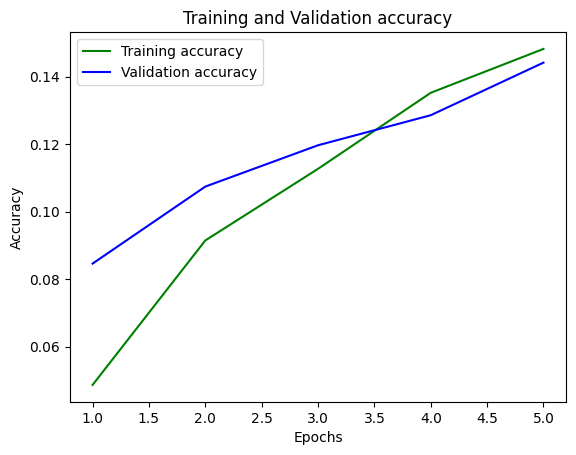

In [54]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
xaxis = range(1,epochs+1)
plt.plot(xaxis, loss_train, 'g', label='Training accuracy')
plt.plot(xaxis, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

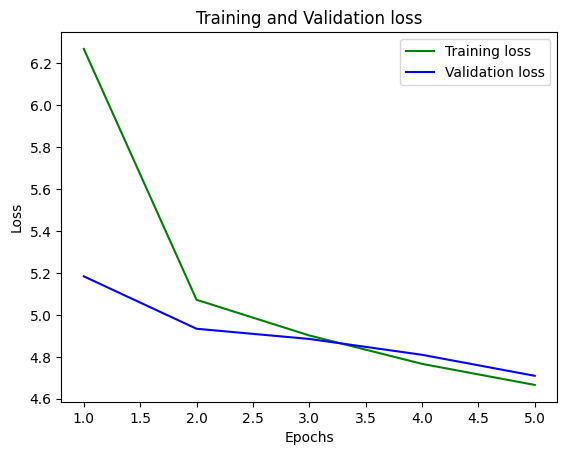

In [55]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
xaxis = range(1,epochs+1)
plt.plot(xaxis, loss_train, 'g', label='Training loss')
plt.plot(xaxis, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [56]:
#Evaluate the Model on Test Data
test_loss, test_accuracy = model.evaluate(test_generator)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

90/90 ━━━━━━━━━━━━━━━━━━━━ 17s 185ms/step - accuracy: 0.1423 - loss: 4.6821
Test Loss: 4.655993461608887
Test Accuracy: 0.15072302520275116
